In [1]:
#Импортируем необходимые модули
import numpy as np

import seaborn as sns; sns.set()

from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GMM
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Для кластеров = 2 средний силуэт : 0.7049787496083262
Для кластеров = 3 средний силуэт : 0.5882004012129721
Для кластеров = 4 средний силуэт : 0.6505186632729437
Для кластеров = 5 средний силуэт : 0.56376469026194
Для кластеров = 6 средний силуэт : 0.4504666294372765
Для кластеров = 8 средний силуэт : 0.3314853899648912


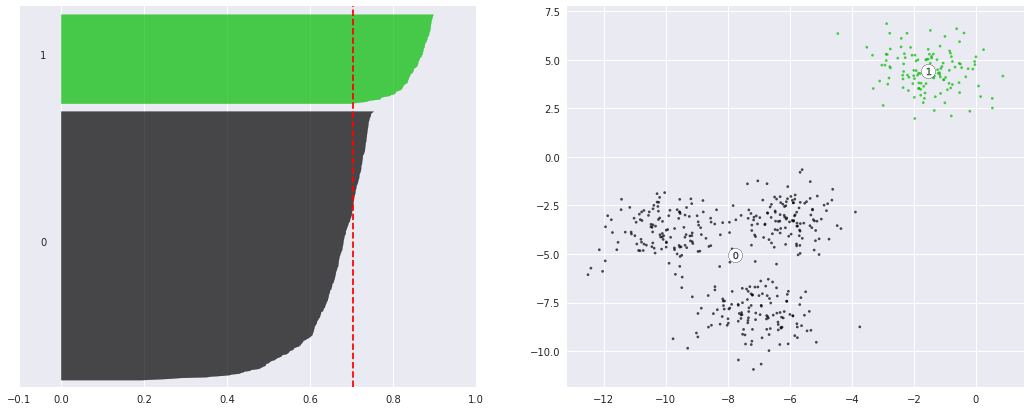

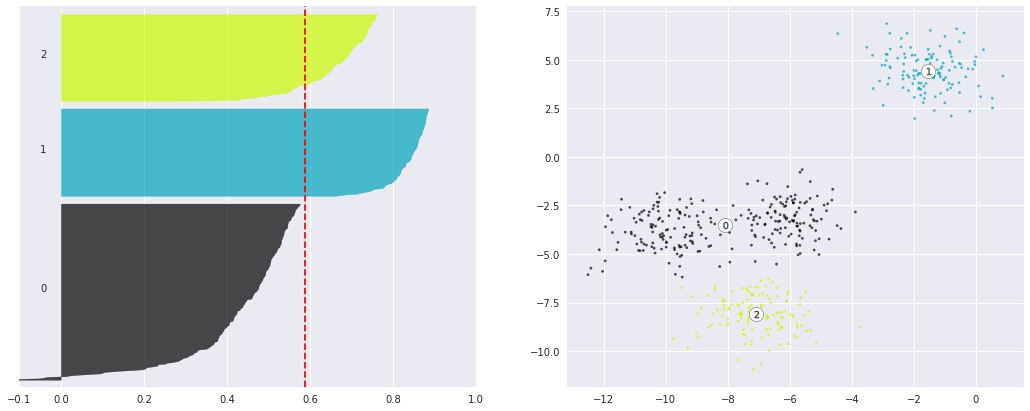

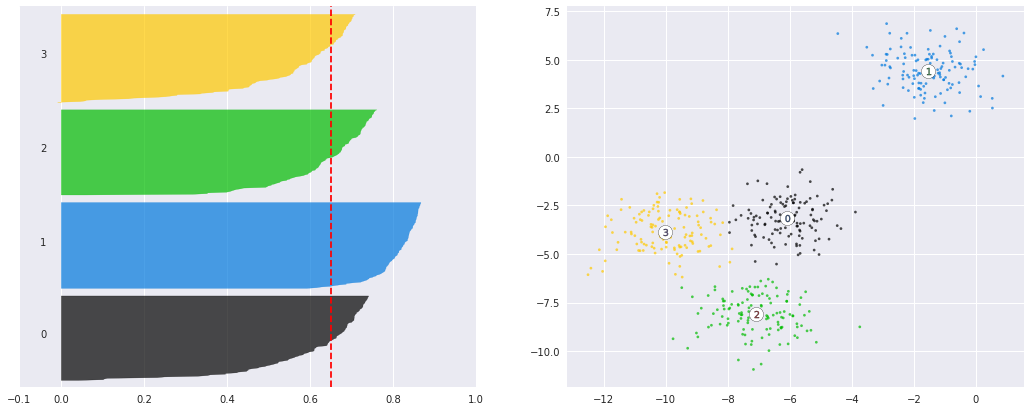

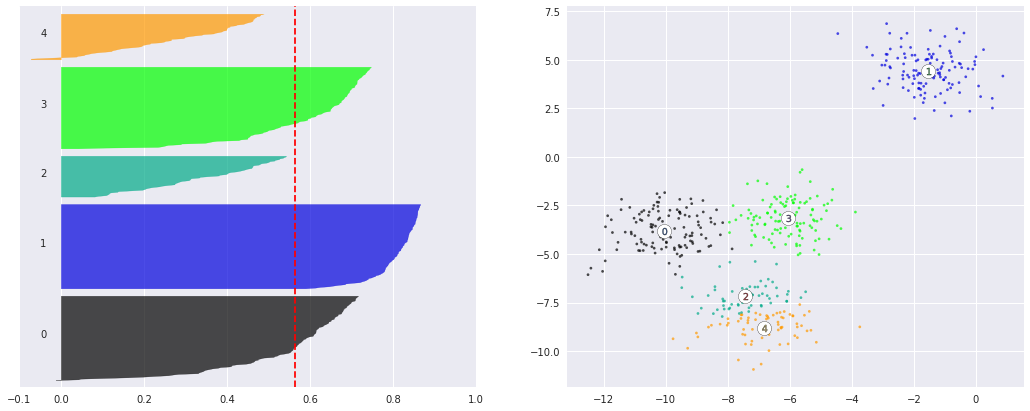

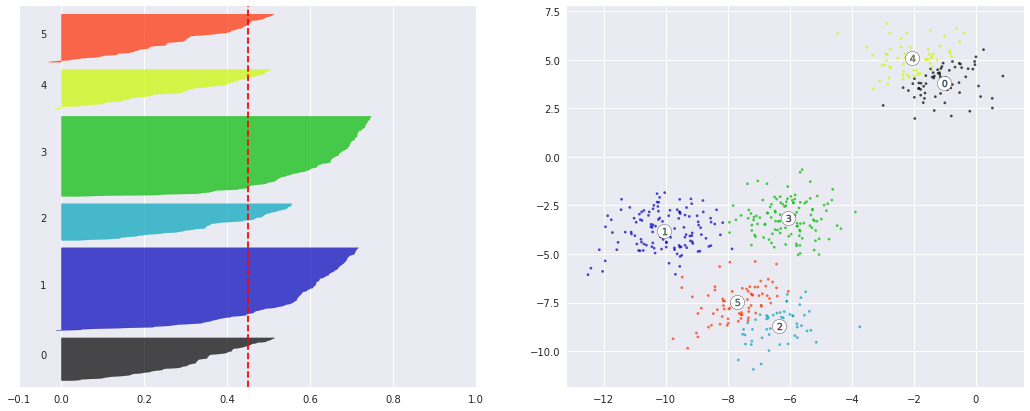

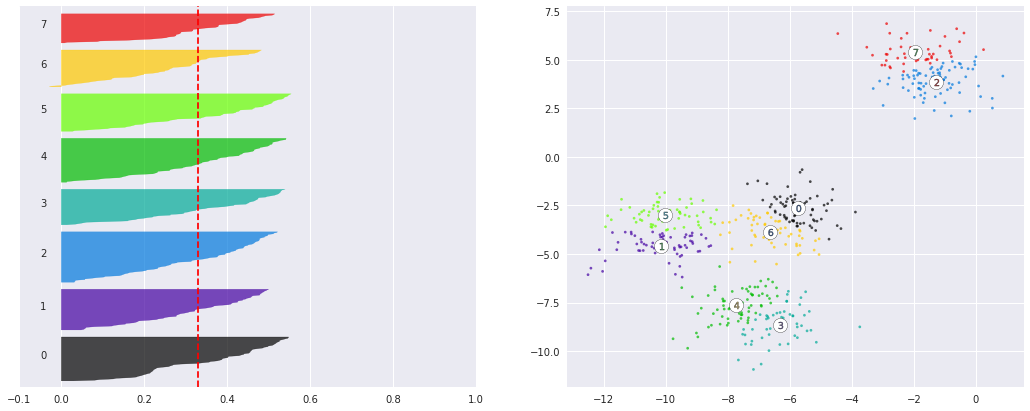

In [3]:
#Пример анализа силуэтов
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

range_n_clusters = [2, 3, 4, 5, 6, 8]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Для кластеров =", n_clusters,
          "средний силуэт :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
plt.show()

In [22]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit_predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)  


In [5]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]

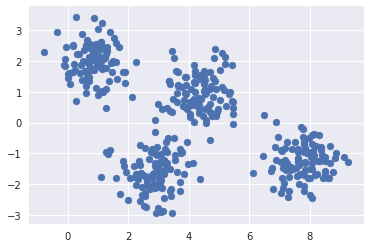

In [9]:
scatter(X[:, 0], X[:, 1])

In [11]:
clusterer = AgglomerativeClustering(n_clusters=4).fit_predict(X)
#Применим агломеративную кластеризацию для 4- кластеров и отрисуем

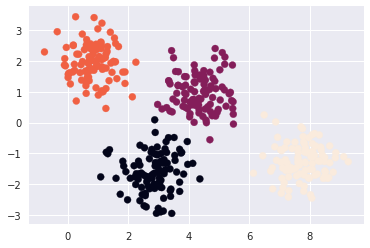

In [17]:
scatter(X[:, 0], X[:, 1], c=clusterer)

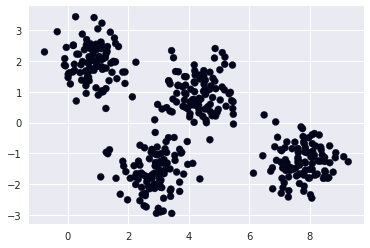

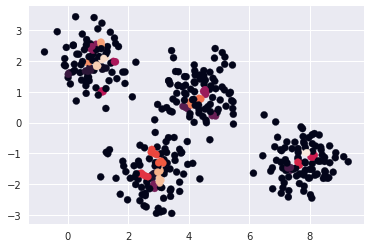

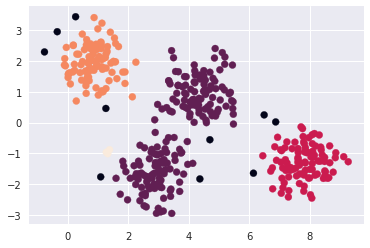

In [18]:
epss = [0.01, 0.1, 0.5]
for eps in epss:
    clusters = DBSCAN(min_samples=3, eps=eps).fit_predict(X)
    scatter(X[:, 0], X[:, 1], c=clusters)
    plt.show()
#ПРименим DBSCAN и посмотрим, что получили

In [19]:
import warnings

warnings.filterwarnings("ignore")

1


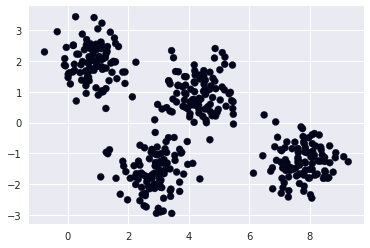

3


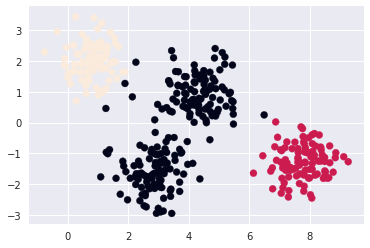

4


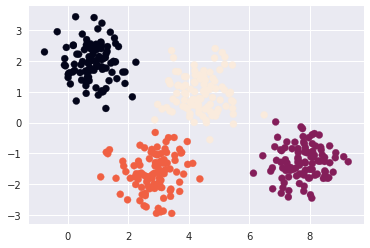

7


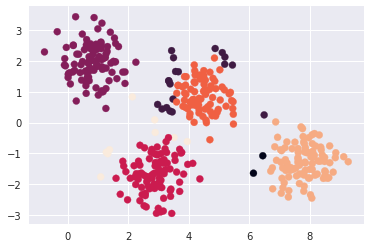

10


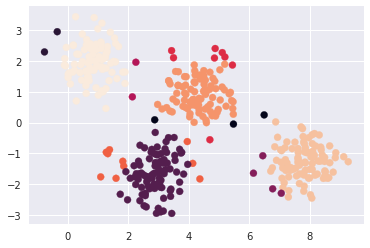

In [21]:
#Применим GMM и посмотрим
clusters_num = [1, 3, 4, 7, 10]
for cl in clusters_num:
    print(cl)
    clusters = GMM(cl).fit_predict(X)
    scatter(X[:, 0], X[:, 1], c=clusters)
    plt.show()

In [24]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

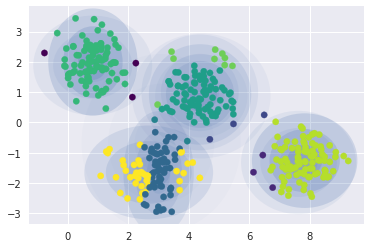

In [26]:
from matplotlib.patches import Ellipse

plot_gmm(GMM(10), X, label=True, ax=None)

1


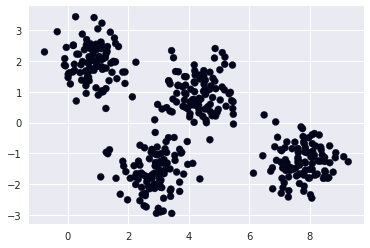

3


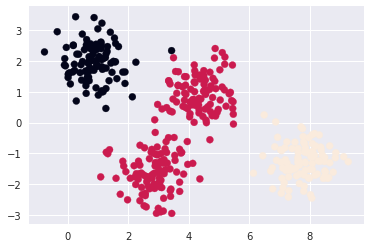

4


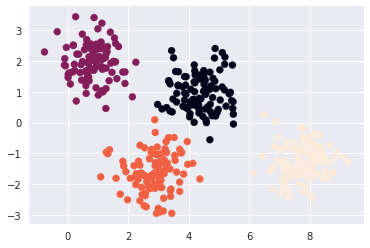

7


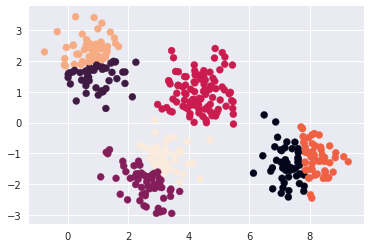

10


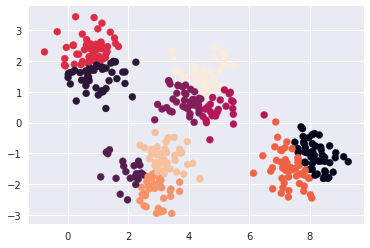

In [27]:
#Применим KMeans
clusters_num = [1, 3, 4, 7, 10]
for cl in clusters_num:
    print(cl)
    clusters = KMeans(cl).fit_predict(X)
    scatter(X[:, 0], X[:, 1], c=clusters)
    plt.show()

In [ ]:
#Проделаем аналогичное с лунами.